Algoritmo Simulated Annealing

Problema 8-Rainhas

In [73]:
import random


class State:
    def __init__(self, state):
        # state is a list (solution)
        self.state = state

    # number of attacks
    def evaluation(self):
        h = 0
        # check for diagonal attacks
        for i in range(0, len(self.state)):
            for j in range(0, len(self.state)):
                if j > i:
                    if abs(i - j) == abs(self.state[i] - self.state[j]):
                        h += 1
                    # Evaluate each column for detecting attacks
                    if abs(self.state[i] - self.state[j]) == 0:
                        h += 1
        return h

    def getCurrentState(self):
        return self.state

    def neighbor(self):  # returns the best neighbor
        # Dictionary with all possible solution for each queen
        neighbors = {}
        for i in range(0, len(self.state)):
            for j in range(0, len(self.state)):
                if j != self.state[i]:
                    temp = self.state.copy()
                    temp[i] = j
                    # Generate a new solution list (state)
                    temp = State(temp)
                    # Evaluate the number of attacks (heuristic) for each new state
                    neighbors[
                        (i, j)
                    ] = temp.evaluation()  # list of neighbors' evaluation value

        best_neighbors = {}  # Store the best heuristic
        best_h = (
            self.evaluation()
        )  # assign current state evaluation to the best evaluation

        # Iterate dict itens (i,j)
        # Where i is the key and h the value (number of attacks)
        for i, h in neighbors.items():

            # check if there is a better state than the current state
            if h < best_h:
                best_h = h
                if len(best_neighbors) > 0:
                    # reset the dictionary if a better h is found
                    best_neighbors.clear()
                best_neighbors[i] = best_h
            if h <= best_h + 1:
                best_neighbors[i] = best_h
        # if there are more than one better solution then choose one of them randomly
        # It is also possible to choose in a greedy way
        if len(best_neighbors.keys()) > 0:
            random_index = random.randint(0, len(best_neighbors.keys()) - 1)
            list_neighbors = list(best_neighbors.keys())
            self.state[list_neighbors[random_index][0]] = list_neighbors[random_index][
                1
            ]

        return State(self.state)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# board graphic


def board(solution):
    matrix = np.zeros([len(solution), len(solution)], dtype=int)
    matrix = matrix.tolist()
    for i in range(len(solution)):
        matrix[solution[i]][i] = 1

    l = []
    for i in range(1, len(solution) + 1):
        l.append(i)
    plt.figure(figsize=(5, 5))
    sns.heatmap(
        matrix, linewidths=0.8, cbar=False, cmap="Set3", xticklabels=l, yticklabels=l
    )

In [75]:
from random import shuffle

initial_state = []
for i in range(0, 8):
    initial_state.append(i)
shuffle(initial_state)

Estado Inicial:		 [7, 5, 3, 0, 2, 4, 1, 6] 	 3 ataques 	Temperatura: 512


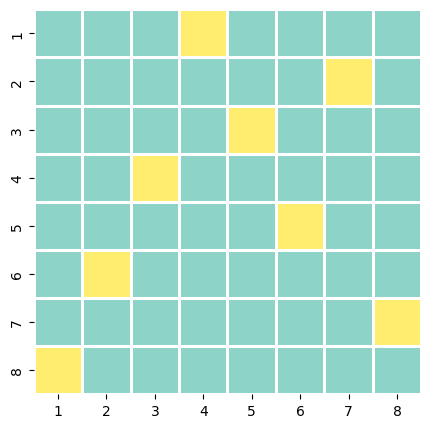

In [76]:
from math import e


def TemperaturaInicial(S):
    # Calcula a temperatura inicial
    return len(S.getCurrentState()) ** 3
    # return 64000


def LogBordState(S, state_str):
    print(f"{state_str}:\t\t {S.getCurrentState()} \t {
          S.evaluation()} ataques \tTemperatura: {TemperaturaInicial(S)}")
    board(S.getCurrentState())

# State, numero Maximo de Interações, numero Maximo de Perturbações por iteração,
# numero Maximo de sucessos por iteração, Factor de redução da temperatura


def SimulatedAnnealing(S, numMaxInter=64, numMaxPert=64, numMaxSuccess=32, a=0.95, canPrint=False):
    execuções = 0
    T = TemperaturaInicial(S)

    j = 1
    while True:
        i = 1
        numeroSucesso = 0
        while True:
            execuções += 1
            Si = State(S.state.copy())
            Si.neighbor()
            delta = Si.evaluation() - S.evaluation()
            if delta <= 0 or e ** (-delta / T) > random.random():
                if canPrint:
                    LogBordState(Si, "Estado Aceito")
                S = Si
                numeroSucesso = numeroSucesso + 1
            else:
                if canPrint:
                    LogBordState(Si, "Estado Rejeitado")
                i = i + 1
            if numeroSucesso >= numMaxSuccess or i > numMaxPert or S.evaluation() == 0 or T < 0.00001:
                break
        T = a * T
        j = j + 1
        if numeroSucesso == 0 or j >= numMaxInter or S.evaluation() == 0 or T < 0.00001:
            break
    return S


LogBordState(State(initial_state), "Estado Inicial")

Estado Final:		 [2, 5, 3, 0, 7, 4, 6, 1] 	 0 ataques 	Temperatura: 512


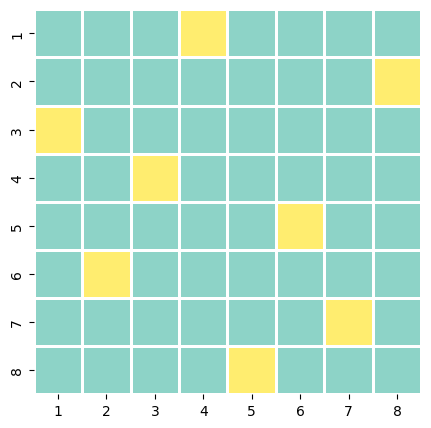

In [77]:
resp = SimulatedAnnealing(State(initial_state), 1024, 1024, 1, 0.95)
LogBordState(resp, "Estado Final")